In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Download MNIST datasets 
# This datasets include 2 tapples. x_train, x_test(28,28) and y_train, y_test(9 classes).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


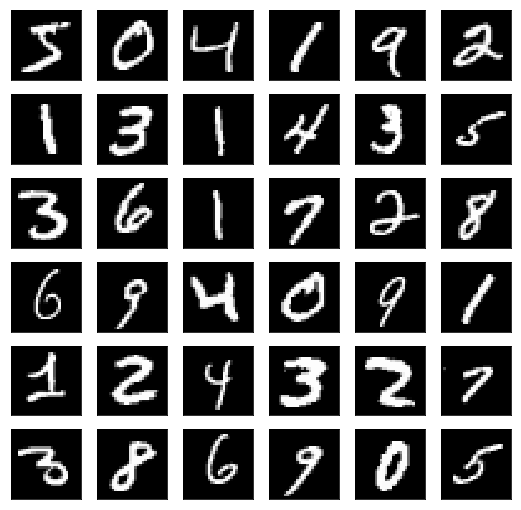

In [9]:
# show sample data
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gist_gray')

In [10]:
# reshape 28*28 pixel data into 784 dim data
# convert into float type and normalize pixel data from 0.0 to 1.0
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

# encode label data into "one-hot" 
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.2557 - acc: 0.9204 - val_loss: 0.1046 - val_acc: 0.9681
Epoch 2/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.1097 - acc: 0.9674 - val_loss: 0.0968 - val_acc: 0.9717
Epoch 3/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.0834 - acc: 0.9750 - val_loss: 0.0964 - val_acc: 0.9737
Epoch 4/20
60000/60000 [==============================] - 10s 160us/step - loss: 0.0723 - acc: 0.9787 - val_loss: 0.0722 - val_acc: 0.9792
Epoch 5/20
60000/60000 [==============================] - 10s 158us/step - loss: 0.0567 - acc: 0.9836 - val_loss: 0.0831 - val_acc: 0.9797
Epoch 6/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0914 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 10s 161us/step - loss: 0.0480 - acc: 0.9861 - val_loss: 0.

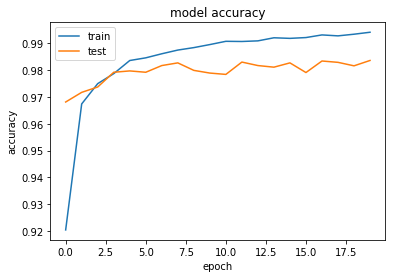

In [11]:

# Functional API

import matplotlib.pyplot as plt
from keras.engine import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop

# from MnistData import reshapeDataToOneDimension

inputs = Input(shape=(784,))

nw = Dense(512, activation='relu')(inputs)
nw = Dropout(.2)(nw)
nw = Dense(512, activation='relu')(nw)
nw = Dropout(.2)(nw)
predictions = Dense(10, activation='softmax')(nw)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# (x_train, y_train), (x_test, y_test) = reshapeDataToOneDimension()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

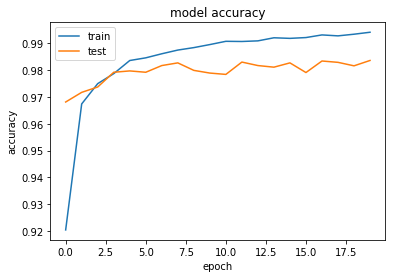

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

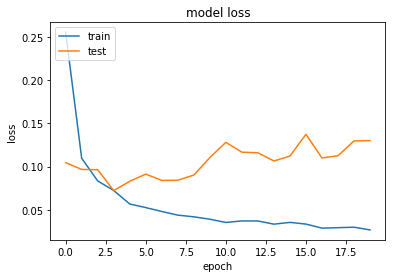

In [14]:
# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
model.save("model_mnist_cnn.h5")

index: 5767
predict ret: [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


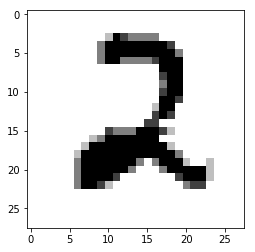

I think this digit is a  2


In [23]:
from keras.models import load_model
import random
import numpy as np
from matplotlib import cm

'''
LOAD MODEL AND PREDICT
'''
model = load_model('model_mnist_cnn.h5')

index = random.randint(0, len(x_test)-1)
print("index:", index)

ret = model.predict(x_test[index:(index+1)], batch_size=1)   # OK
print("predict ret:", ret)

np.set_printoptions(precision=5, suppress=True) #指数表示の禁止

plt.imshow(x_test[index].reshape(28, 28), cmap=cm.gray_r)
plt.show()

bestnum = 0.0
bestclass = 0
for n in [0,1,2,3,4,5,6,7,8,9]:
    if bestnum < ret[0][n]:
        bestnum = ret[0][n]
        bestclass = n

print("I think this digit is a ", bestclass)

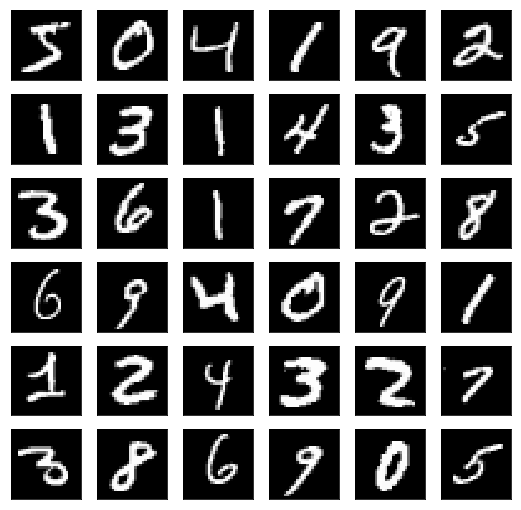

In [25]:
x_train[5]

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.  